## Python imports

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


## Read MNIST data (download if necessary)

In [2]:
mnist = input_data.read_data_sets('../data/', one_hot=True)

Extracting ../data/train-images-idx3-ubyte.gz
Extracting ../data/train-labels-idx1-ubyte.gz
Extracting ../data/t10k-images-idx3-ubyte.gz
Extracting ../data/t10k-labels-idx1-ubyte.gz


## Verify data shape

* Training set
* Validation set
* Test set

In [3]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [4]:
mnist.validation.images.shape, mnist.validation.labels.shape

((5000, 784), (5000, 10))

In [5]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

## Configure neural network

* 784 input units
* 15 hidden units with sigmoid activation functions
* 10 softmax output units

In [6]:
model = models.Sequential()
model.add(layers.Dense(15, activation = 'sigmoid', input_shape = (28 * 28,)))
model.add(layers.Dense(10, activation = 'softmax'))

## Specify loss function and optimizer

* Categorical cross-entropy loss function
* RMSprop optimizer (learning rate is adapted for each parameter)

In [7]:
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

## Model summary

In [8]:
model.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1_input (InputLayer)   (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


## Train the neural network

In [9]:
history = model.fit(mnist.train.images,
                    mnist.train.labels,
                    epochs = 20,
                    verbose = 2,
                    batch_size = 512,
                    validation_data = (mnist.validation.images, mnist.validation.labels))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
0s - loss: 1.8000 - acc: 0.5405 - val_loss: 1.4466 - val_acc: 0.7438
Epoch 2/20
0s - loss: 1.2511 - acc: 0.7997 - val_loss: 1.0558 - val_acc: 0.8444
Epoch 3/20
0s - loss: 0.9418 - acc: 0.8498 - val_loss: 0.8051 - val_acc: 0.8674
Epoch 4/20
0s - loss: 0.7376 - acc: 0.8697 - val_loss: 0.6376 - val_acc: 0.8878
Epoch 5/20
0s - loss: 0.6003 - acc: 0.8815 - val_loss: 0.5252 - val_acc: 0.8968
Epoch 6/20
0s - loss: 0.5063 - acc: 0.8911 - val_loss: 0.4472 - val_acc: 0.9022
Epoch 7/20
0s - loss: 0.4416 - acc: 0.8975 - val_loss: 0.3940 - val_acc: 0.9094
Epoch 8/20
0s - loss: 0.3960 - acc: 0.9028 - val_loss: 0.3581 - val_acc: 0.9128
Epoch 9/20
0s - loss: 0.3627 - acc: 0.9073 - val_loss: 0.3305 - val_acc: 0.9178
Epoch 10/20
0s - loss: 0.3377 - acc: 0.9109 - val_loss: 0.3097 - val_acc: 0.9210
Epoch 11/20
0s - loss: 0.3182 - acc: 0.9144 - val_loss: 0.2936 - val_acc: 0.9228
Epoch 12/20
0s - loss: 0.3026 - acc: 0.9171 - val_loss: 0.2808 - val_

## Evaluate model accuracy on test data

In [10]:
test_loss, test_acc = model.evaluate(mnist.test.images, mnist.test.labels, verbose = 0)
print()
print("Test accuracy:")
test_acc


Test accuracy:


0.93069999999999997

## Compute predicted values and predicted probabilities in test data

In [11]:
y_pred = model.predict_classes(mnist.test.images, verbose = 0)
y_actual = mnist.test.labels.argmax(1)

digits = [str(i) for i in range(10)]

y_prob = model.predict(mnist.test.images)

## Diagnostic measures

In [12]:
print()
print("Classification report")
print(classification_report(y_actual, y_pred, target_names = digits))


Classification report
             precision    recall  f1-score   support

          0       0.95      0.97      0.96       980
          1       0.98      0.98      0.98      1135
          2       0.94      0.92      0.93      1032
          3       0.90      0.92      0.91      1010
          4       0.93      0.95      0.94       982
          5       0.91      0.87      0.89       892
          6       0.94      0.96      0.95       958
          7       0.94      0.93      0.93      1028
          8       0.89      0.90      0.89       974
          9       0.92      0.91      0.92      1009

avg / total       0.93      0.93      0.93     10000



## Confusion matrix

In [13]:
print()
print("Confusion matrix")
print(confusion_matrix(y_actual, y_pred))


Confusion matrix
[[ 950    0    1    2    1   10   10    4    2    0]
 [   0 1107    3    3    1    2    4    1   14    0]
 [  10    0  948   18    7    0   14    7   25    3]
 [   0    1   16  930    1   23    1   14   18    6]
 [   1    2    5    0  929    0    7    3    5   30]
 [   8    4    3   36    7  777   12    9   31    5]
 [   7    2    6    0    6   11  919    0    7    0]
 [   2    9   23    7    6    0    1  954    2   24]
 [   6    2    7   22   11   24    9   12  874    7]
 [  12    3    1   12   30    9    1   15    7  919]]


## Identify test examples where the model is wrong

In [14]:
errors = np.where(np.not_equal(y_actual, y_pred))
print()
print("Errors")
print(len(errors[0]))
# print(errors)


Errors
693


## Utility functions

In [15]:
def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

In [16]:
def review(idx):
    img = mnist.test.images[idx]
    img = img.reshape((28, 28))
    show(img)
    print("Index: {}".format(idx))
    print("Predicted: {0}, Actual: {1}".format(y_pred[idx], y_actual[idx]))
    print("y_prob: {0}".format(np.array_str(y_prob[idx], precision = 2, suppress_small = True)))

## Look at some randomly selected errors

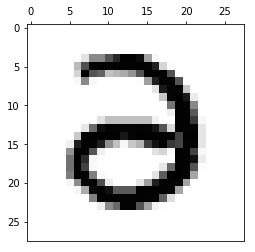

Index: 2780
Predicted: 3, Actual: 2
y_prob: [ 0.03  0.    0.12  0.78  0.04  0.    0.    0.    0.02  0.  ]


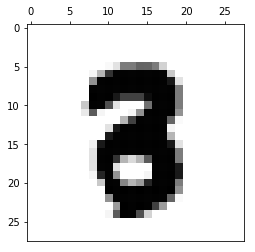

Index: 1114
Predicted: 8, Actual: 3
y_prob: [ 0.    0.    0.04  0.12  0.    0.01  0.    0.    0.82  0.01]


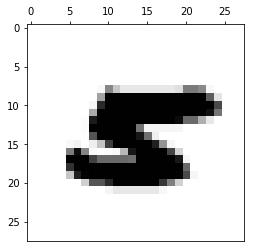

Index: 7850
Predicted: 8, Actual: 5
y_prob: [ 0.04  0.    0.04  0.    0.08  0.22  0.16  0.    0.46  0.01]


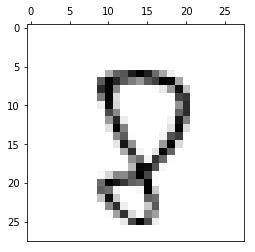

Index: 3951
Predicted: 7, Actual: 8
y_prob: [ 0.04  0.    0.15  0.09  0.    0.26  0.    0.33  0.09  0.04]


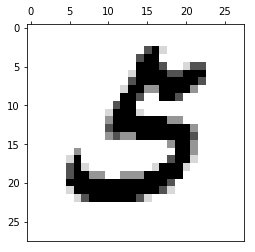

Index: 9427
Predicted: 3, Actual: 5
y_prob: [ 0.    0.    0.    0.61  0.    0.38  0.    0.    0.    0.  ]


In [17]:
from random import sample
for i in sample(list(errors[0]), 5):
    review(i)